In [41]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
import numpy as np
import time
os.chdir('/media/kursat/Data/projects/Tansel Bey/tflite_files')

In [4]:
kazma_ornek = os.path.join('signal_TEST', 'kazma_16', 'kazma_160.wav')
kürek_ornek = os.path.join('signal_TEST', 'shovel_16', 'shovel_160.wav')
yurume_ornek = os.path.join('signal_TEST', 'walk_16', 'walk_160.wav')

In [5]:
print(kazma_ornek)
print(kürek_ornek)
print(yurume_ornek)

signal_TEST/kazma_16/kazma_160.wav
signal_TEST/shovel_16/shovel_160.wav
signal_TEST/walk_16/walk_160.wav


In [6]:
def load_wav(filename):
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [8]:
file_contents_kazma = tf.io.read_file(kazma_ornek)
file_contents_kürek = tf.io.read_file(kürek_ornek)
file_contents_yurume = tf.io.read_file(yurume_ornek)

In [9]:
wav_kazma, sample_rate_kazma = tf.audio.decode_wav(file_contents_kazma, desired_channels=1)
wav_kürek, sample_rate_kürek = tf.audio.decode_wav(file_contents_kürek, desired_channels=1)
wav_yurume, sample_rate_yurume = tf.audio.decode_wav(file_contents_yurume, desired_channels=1)

In [10]:
print(sample_rate_kazma)
print(sample_rate_kürek)
print(sample_rate_yurume)
print(len(wav_kazma))
print(len(wav_kürek))
print(len(wav_yurume))

tf.Tensor(1042, shape=(), dtype=int32)
tf.Tensor(1042, shape=(), dtype=int32)
tf.Tensor(1042, shape=(), dtype=int32)
1841
1235
629


2022-11-24 15:46:02.179055: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA


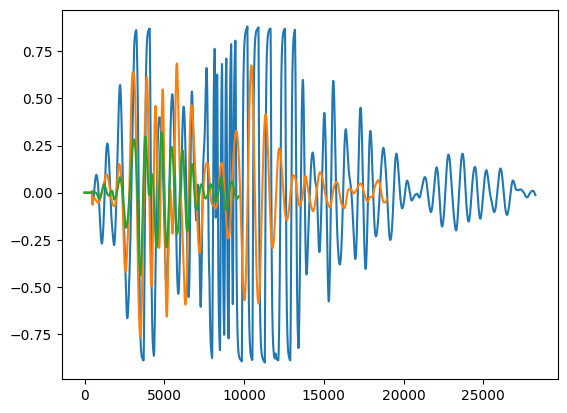

In [11]:
wave_kazma = load_wav(kazma_ornek)
wave_kurek = load_wav(kürek_ornek)
wave_yurume = load_wav(yurume_ornek)
plt.plot(wave_kazma)
plt.plot(wave_kurek)
plt.plot(wave_yurume)
plt.show()

In [12]:
KAZMA = os.path.join('signal_TEST', 'kazma_16')
KUREK = os.path.join('signal_TEST', 'shovel_16')
YURUME = os.path.join('signal_TEST', 'walk_16')

In [13]:
kazma = tf.data.Dataset.list_files(KAZMA+'/*.wav')
kurek = tf.data.Dataset.list_files(KUREK+'/*.wav')
yurume = tf.data.Dataset.list_files(YURUME+'/*.wav')
kazma.as_numpy_iterator().next()
kurek.as_numpy_iterator().next()
yurume.as_numpy_iterator().next()

b'signal_TEST/walk_16/walk_165.wav'

In [14]:
kazmalar = tf.data.Dataset.zip((kazma, tf.data.Dataset.from_tensor_slices(tf.ones(len(kazma)))))
kurekler = tf.data.Dataset.zip((kurek, tf.data.Dataset.from_tensor_slices(tf.zeros(len(kurek)))))
yurumeler = tf.data.Dataset.zip((yurume, tf.data.Dataset.from_tensor_slices(tf.constant(2, shape=len(yurume), dtype=tf.float32))))

In [15]:
print(type(kazmalar))
data1 = kazmalar.concatenate(kurekler)
data2 = tf.data.Dataset.zip(data1)
data = data2.concatenate(yurumeler)

<class 'tensorflow.python.data.ops.dataset_ops.ZipDataset'>


In [16]:
data.shuffle(10000).as_numpy_iterator().next()

(b'signal_TEST/kazma_16/kazma_1667.wav', 1.0)

In [17]:
lengths_kazma = []
lengths_kurek = []
lengths_yurume = []

for file in os.listdir(os.path.join('signal_TEST', 'kazma_16')): #kazma
    print(file)
    tensor_wave_kazma = load_wav(os.path.join('signal_TEST', 'kazma_16', file))
    lengths_kazma.append(len(tensor_wave_kazma))

for file in os.listdir(os.path.join('signal_TEST', 'shovel_16')): #kürek
    print(file)
    tensor_wave_kurek = load_wav(os.path.join('signal_TEST', 'shovel_16', file))
    lengths_kurek.append(len(tensor_wave_kurek))

for file in os.listdir(os.path.join('signal_TEST', 'walk_16')): #yurume
    print(file)
    tensor_wave_yurume = load_wav(os.path.join('signal_TEST', 'walk_16', file))
    lengths_yurume.append(len(tensor_wave_yurume))

kazma_160.wav
kazma_161.wav
kazma_1610.wav
kazma_16100.wav
kazma_16101.wav
kazma_16102.wav
kazma_16103.wav
kazma_16104.wav
kazma_16105.wav
kazma_16106.wav
kazma_16107.wav
kazma_16108.wav
kazma_16109.wav
kazma_1611.wav
kazma_16110.wav
kazma_16111.wav
kazma_16112.wav
kazma_16240.wav
kazma_1625.wav
kazma_1626.wav
kazma_1627.wav
kazma_1628.wav
kazma_1629.wav
kazma_163.wav
kazma_1630.wav
kazma_1631.wav
kazma_1632.wav
kazma_1633.wav
kazma_1634.wav
kazma_1635.wav
kazma_1636.wav
kazma_1637.wav
kazma_1638.wav
kazma_1639.wav
kazma_164.wav
kazma_1641.wav
kazma_1642.wav
kazma_1643.wav
kazma_1644.wav
kazma_1645.wav
kazma_1646.wav
kazma_1647.wav
kazma_1648.wav
kazma_1649.wav
kazma_165.wav
kazma_1650.wav
kazma_1651.wav
kazma_1652.wav
kazma_1653.wav
kazma_1654.wav
kazma_1655.wav
kazma_1656.wav
kazma_1658.wav
kazma_1659.wav
kazma_166.wav
kazma_1660.wav
kazma_1661.wav
kazma_1662.wav
kazma_1663.wav
kazma_1664.wav
kazma_1665.wav
kazma_1666.wav
kazma_1667.wav
kazma_1668.wav
kazma_1669.wav
kazma_167.wav
kaz

In [18]:
tf.math.reduce_mean(lengths_kazma)
tf.math.reduce_mean(lengths_kurek)
tf.math.reduce_mean(lengths_yurume)

tf.math.reduce_min(lengths_kazma)
tf.math.reduce_min(lengths_kurek)
tf.math.reduce_min(lengths_yurume)

tf.math.reduce_max(lengths_kazma)
tf.math.reduce_max(lengths_kurek)
tf.math.reduce_max(lengths_yurume)

<tf.Tensor: shape=(), dtype=int32, numpy=12207>

In [19]:
def preprocess(file_path, label):
    wav = load_wav(file_path)
    #wav = wav[:30000]
    #zero_padding = tf.zeros([30000] - tf.shape(wav), dtype=tf.float32)
    #wav = tf.concat([zero_padding, wav], 0)
    print(wav.shape)
    wav = tf.compat.v1.to_complex64(wav)
    spectrogram = tf.signal.fft(wav) #fft
    print(spectrogram.shape)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=1) #fft
    print(spectrogram.shape)
    spectrogram = spectrogram[0:100, :]
    print(spectrogram.shape)
    print(type(spectrogram))
    return spectrogram, label

In [20]:
filepath_kazma, label_kazma = kazmalar.shuffle(10000).as_numpy_iterator().next()
filepath_kurek, label_kurek = kurekler.shuffle(10000).as_numpy_iterator().next()
filepath_yurume, label_yurume = yurumeler.shuffle(10000).as_numpy_iterator().next()

In [21]:
spectrogram_kazma, label_kazma = preprocess(filepath_kazma, label_kazma)
spectrogram_kurek, label_kurek = preprocess(filepath_kurek, label_kurek)
spectrogram_yurume, label_yurume = preprocess(filepath_yurume, label_yurume)

(38111,)
Instructions for updating:
Use `tf.cast` instead.
(38111,)
(38111, 1)
(100, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(21681,)
(21681,)
(21681, 1)
(100, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
(10635,)
(10635,)
(10635, 1)
(100, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>


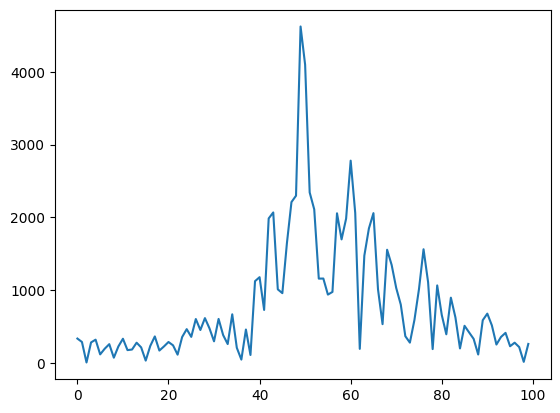

In [22]:
plt.plot(spectrogram_kazma)
plt.show()

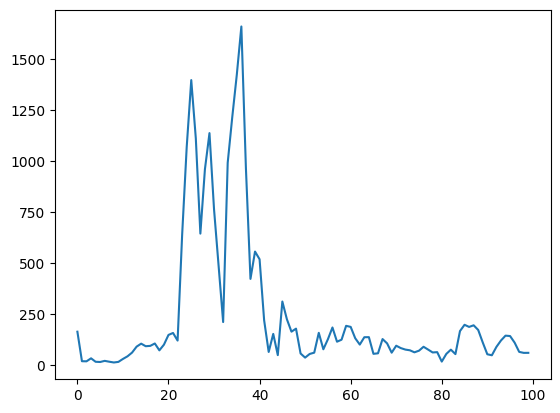

In [23]:
plt.plot(spectrogram_kurek)
plt.show()

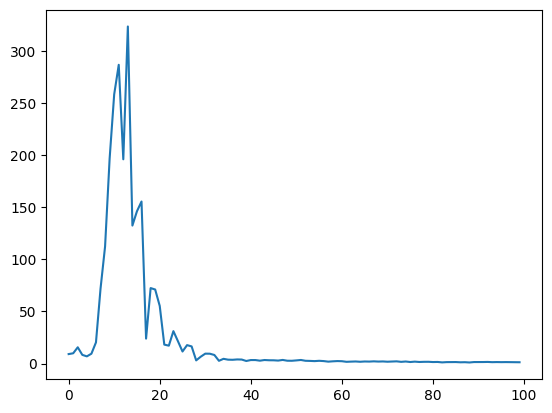

In [24]:
plt.plot(spectrogram_yurume)
plt.show()

In [25]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=100)
data = data.batch(1)
data = data.prefetch(10)

<unknown>
<unknown>
<unknown>
<unknown>
<class 'tensorflow.python.framework.ops.Tensor'>


In [26]:
len(data)

721

In [27]:
train = data.take(int(721*0.7)) #%70
test = data.skip(int(721*0.7)).take(721 - int(721*0.7)) #%30

In [28]:
samples, labels = train.as_numpy_iterator().next()
samples.shape

2022-11-24 15:47:29.481962: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(1, 100, 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Normalization, Embedding, Input, LSTM, Dropout, Conv1D, Dense, Flatten, MaxPooling1D, BatchNormalization

In [192]:
model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(Normalization())
model.add(Conv1D(16, 3, activation='relu'))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [193]:
model.compile(tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [194]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 100, 1)           3         
 tion)                                                           
                                                                 
 conv1d_15 (Conv1D)          (None, 98, 16)            64        
                                                                 
 conv1d_16 (Conv1D)          (None, 96, 32)            1568      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 48, 32)           0         
 1D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 48, 32)            0         
                                                                 
 flatten_9 (Flatten)         (None, 1536)            

In [195]:
hist = model.fit(train, epochs=100, validation_data=test)

Epoch 1/100


/home/kursat/myenvs/platform_env/lib/python3.8/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


504/504 [==============================] - 2s 3ms/step - loss: 21.7871 - accuracy: 0.7440 - val_loss: 0.1329 - val_accuracy: 0.9862
Epoch 2/100
504/504 [==============================] - 1s 2ms/step - loss: 1.4354 - accuracy: 0.7143 - val_loss: 0.5336 - val_accuracy: 0.8571
Epoch 3/100
504/504 [==============================] - 1s 2ms/step - loss: 0.9811 - accuracy: 0.5437 - val_loss: 0.3117 - val_accuracy: 0.9217
Epoch 4/100
504/504 [==============================] - 1s 2ms/step - loss: 0.8717 - accuracy: 0.5952 - val_loss: 0.1966 - val_accuracy: 0.9355
Epoch 5/100
504/504 [==============================] - 1s 2ms/step - loss: 0.7876 - accuracy: 0.7361 - val_loss: 0.2728 - val_accuracy: 0.9171
Epoch 6/100
504/504 [==============================] - 1s 2ms/step - loss: 0.8302 - accuracy: 0.6151 - val_loss: 0.2104 - val_accuracy: 0.9447
Epoch 7/100
504/504 [==============================] - 1s 2ms/step - loss: 0.8417 - accuracy: 0.6210 - val_loss: 0.1116 - val_accuracy: 0.9585
Epoch 8/10

In [199]:
model.save('yeni_model1.h5')

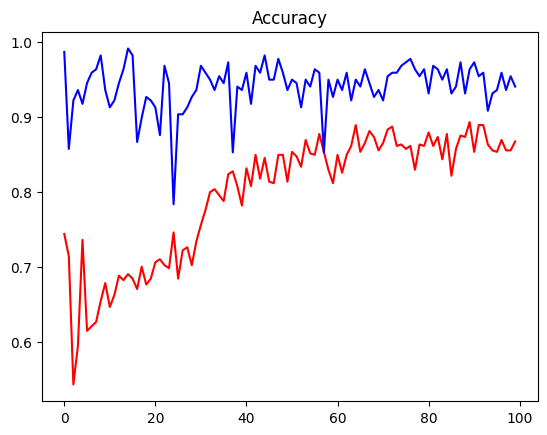

In [197]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.show()

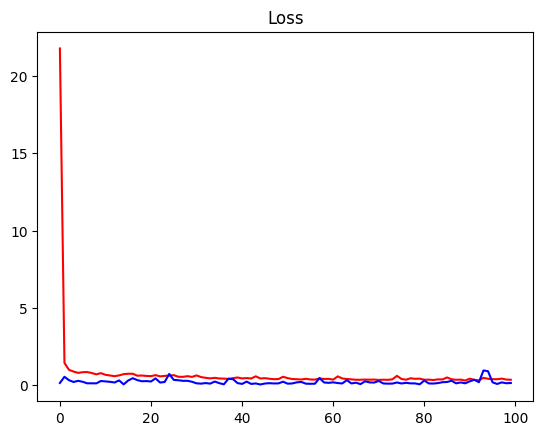

In [198]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()